In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

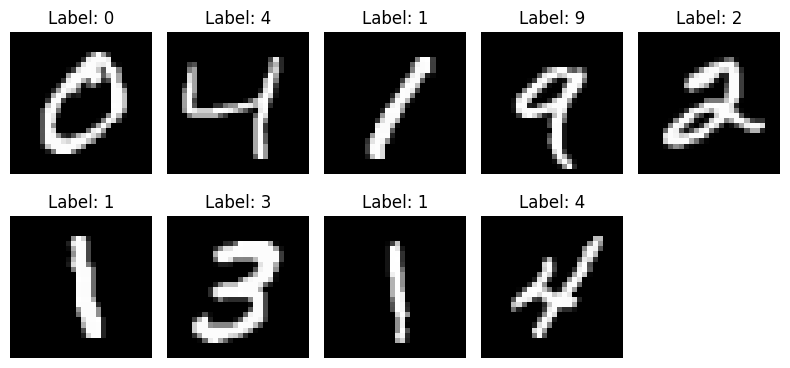

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))

for i in range(1, 10):
  plt.subplot(2, 5, i)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')


plt.tight_layout()
plt.show()

In [10]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28 * 28)

X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

X_train_flat.shape

(60000, 784)

In [11]:
X_train_small = X_train_flat[:10000]
y_train_small = y_train[:10000]

X_test_small = X_test_flat[:2000]
y_test_small = y_test[:2000]

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_small, y_train_small)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred = knn.predict(X_test_small)
y_pred

array([7, 2, 1, ..., 3, 9, 5], dtype=uint8)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_small, y_pred))
print(classification_report(y_test_small, y_pred))

0.9235
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       175
           1       0.90      1.00      0.95       234
           2       0.98      0.89      0.93       219
           3       0.91      0.91      0.91       207
           4       0.94      0.94      0.94       217
           5       0.91      0.91      0.91       179
           6       0.95      0.97      0.96       178
           7       0.89      0.91      0.90       205
           8       0.95      0.80      0.87       192
           9       0.89      0.90      0.89       194

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



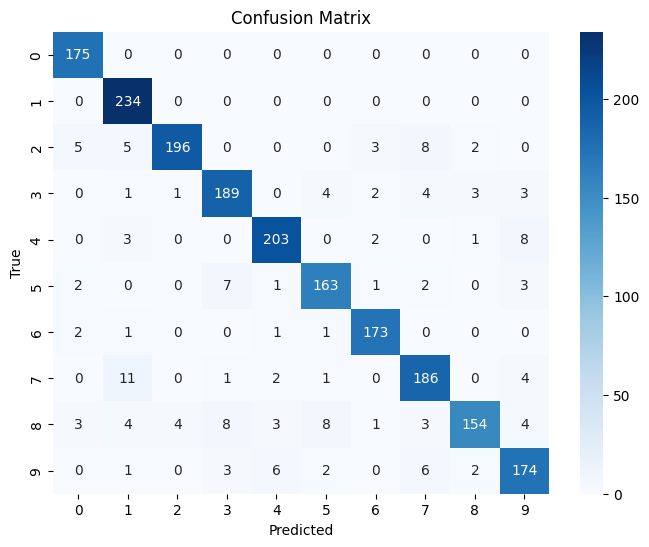

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_small, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [18]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_small, y_train_small)
    acc = knn.score(X_test_small, y_test_small)
    print(f"K = {k} → Accuracy = {acc:.4f}")

K = 1 → Accuracy = 0.9225
K = 3 → Accuracy = 0.9235
K = 5 → Accuracy = 0.9205
K = 7 → Accuracy = 0.9190
K = 9 → Accuracy = 0.9160


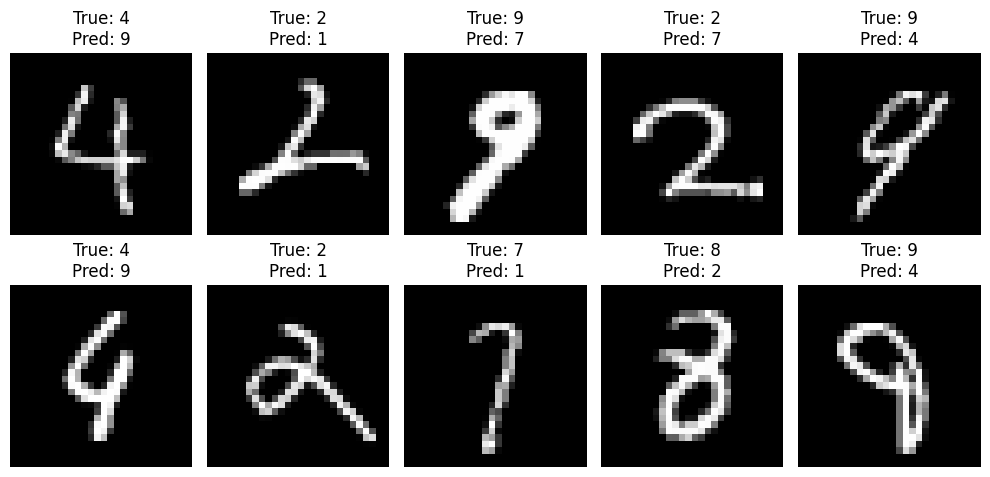

In [31]:
import numpy as np

# Find wrong predictions
misclassified = np.where(y_pred != y_test_small)[0]

# Show first 10 misclassified
plt.figure(figsize=(10, 5))
for i, index in enumerate(misclassified[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test_small[index]}\nPred: {y_pred[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
